# COMPANY XYZ SUPERMARKET DATA ANALYSIS

Company XYZ owns a supermarket chain across the country. Each major branch, located in 3 cities across the country, recorded sales information for 3 months to help the company understand sales trends and determine its growth due to the rise in supermarket competition.

## Step 1 - Loading the Dataset
In this step, I will combine the dataset from each branch (3 branches) into one dataset for easy analysis. I will write the syntaxes that will read multiple files from my current working directory and export a CSV file after file combination. 
The helps to automate reading and combining multiple CSV files.
* [Here](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit) is a link to the dataset description which is identical across files

#### Import Libraries

In [1]:
from csv import reader
import datetime as dt
import pandas as pd
import os
import glob
os.chdir("/Users/osala/Downloads/Data-Analysis-Project-main")
#Current working directory that contains the dataset and code file

#### Use glob to match the pattern "csv" and generate a list of the csv files

In [2]:
extension = 'csv'

all_csv_files = [i for i in glob.glob('*.{}'.format(extension))]
all_csv_files

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']

* Examine the file contents

In [3]:
def examine_csv_files(csv_files, rows_and_columns=True):
    for file in csv_files:
        opened_file = open(file)
        read_file = reader(opened_file)
        csv_data = list(read_file)
        csv_header = csv_data[0]
        csv_data = csv_data[1:]
    
        if rows_and_columns:
            print(csv_header)
            print('\n')
            print('*Number of rows:', len(csv_data))
            print('*Number of columns:', len(csv_header))
            print('\n')
    
examine_csv_files(all_csv_files)

# Confirms identical header rows and prints no of rows and columns

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


*Number of rows: 332
*Number of columns: 17


['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


*Number of rows: 340
*Number of columns: 17


['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


*Number of rows: 328
*Number of columns: 17




#### Combine all the files in the generated list above and export to a CSV


In [4]:
# To combine the csv files,

company_xyz_concat = pd.concat([pd.read_csv(f) for f in all_csv_files])


#Export to csv
company_xyz_concat.to_csv("CompanyXYZcombined.csv", index=False)


#### Read the CSV file using `pd.read_csv` method

In [5]:
company_xyz_concat = pd.read_csv('CompanyXYZcombined.csv')

## Step 2 - Data Exploration
In this step I will explore the loaded dataset using some built-in Pandas functions. 
For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### Use the head() method to view first few rows of the dataset

In [7]:
company_xyz_concat.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### Check the number of rows and columns present in the data using the shape attribute.

In [8]:
company_xyz_concat.shape

(1000, 17)

#### Generate the names of the columns using the columns attribute.

In [9]:
company_xyz_concat.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### Statistical Summary
The `describe` method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [10]:
company_xyz_concat.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### Below this cell write in few sentences what you can derive from the data statistical summary
* Why is the `gross margin percentage` column returning values in exponential notation?
* The data looks normally distributed

#### Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [11]:

company_xyz_concat.isnull().sum()
company_xyz_concat.notnull().sum()
company_xyz_concat.notna().sum()
#There are no missing data

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

#### Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [12]:
company_xyz_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### Use `to_datetime()` to convert the `date` column to `datetime`

In [13]:
#import datetime as dt (optional here)
company_xyz_concat['Date'] = pd.to_datetime(company_xyz_concat['Date'])

#### Check the datatype to confirm if it's in `datetime`

In [14]:
company_xyz_concat['Date'].dtypes

dtype('<M8[ns]')

#### Repeat the two steps above to the `time` column

In [15]:
company_xyz_concat['Time'] = pd.to_datetime(company_xyz_concat['Time'])
company_xyz_concat['Time'].dtypes

dtype('<M8[ns]')

## Extract Features from date & time

#### Extract the Day feature from the `Date` column, and save to a new `Day` column

In [16]:

company_xyz_concat['Day'] = company_xyz_concat['Date'].dt.day


#### Extract the Month feature from the `Date` column, and save to a new `Month` column

In [17]:

company_xyz_concat['Month'] = company_xyz_concat['Date'].dt.month

#### Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [18]:
company_xyz_concat['Year'] = company_xyz_concat['Date'].dt.year

#### Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [19]:
company_xyz_concat['Hour'] = company_xyz_concat['Time'].dt.hour
company_xyz_concat.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-05-24 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-05-24 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-05-24 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-05-24 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-05-24 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [20]:

company_xyz_concat['Hour'].nunique()


11

In [21]:
company_xyz_concat['Hour'].unique()
# What if you add the sum method? It returns a sum of the unique values

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [22]:
categorical_columns = [col for col in company_xyz_concat.columns if company_xyz_concat[col].dtype == "object"]
#categorical_columns
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [23]:
#Example - Uncomment the Code and Run it
company_xyz_concat['Branch'].unique().tolist()

['B', 'A', 'C']

In [24]:
print("Total Number of unique values in the Branch Column : {}".format(len(company_xyz_concat['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [25]:
for category in categorical_columns:
    unique_values = company_xyz_concat[category].unique().tolist()
    if category == 'Branch':
        continue
    print("Total Number of unique values in the {} Column: {}"
          .format(category, len(company_xyz_concat['Branch'].unique().tolist())))

Total Number of unique values in the Invoice ID Column: 3
Total Number of unique values in the City Column: 3
Total Number of unique values in the Customer type Column: 3
Total Number of unique values in the Gender Column: 3
Total Number of unique values in the Product line Column: 3
Total Number of unique values in the Payment Column: 3


#### The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [26]:
#Example
#df['City'].value_counts()
for category in categorical_columns:
    print(company_xyz_concat[category].value_counts())

173-50-1108    1
470-32-9057    1
817-69-8206    1
258-69-7810    1
488-25-4221    1
              ..
838-78-4295    1
340-66-0321    1
848-24-9445    1
226-31-3081    1
600-38-9738    1
Name: Invoice ID, Length: 1000, dtype: int64
A    340
B    332
C    328
Name: Branch, dtype: int64
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64


## Step 5 - Aggregration with GroupBy

#### Your task here will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [27]:
cities = company_xyz_concat.groupby(['City'])
cities.mean()
cities.size()
cities.sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


#### Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [28]:
cities.get_group('Abuja')['Total'].sum()
cities['gross income'].sum()

City
Abuja            1820531.52
Lagos            1820577.78
Port Harcourt    1895463.54
Name: gross income, dtype: float64

In [29]:
cities['gross income'].sum().max()
# The city with the highest gross income

#city_highest_gincome = "Port Harcourt", 1895463.54

1895463.539999999

In [30]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 
cities.agg({'gross income': ['sum', 'mean'], 'Unit price': ['sum', 'mean'], 'Quantity': ['sum', 'mean'],
            'Rating': ['sum', 'mean', 'min']})

gross income              Unit price               Quantity  \
                       sum         mean        sum          mean      sum   
City                                                                        
Abuja           1820531.52  5483.528675  6652396.8  20037.339759     1820   
Lagos           1820577.78  5354.640529  6705176.4  19721.107059     1859   
Port Harcourt   1895463.54  5778.852256  6684393.6  20379.248780     1831   

                         Rating                 
                   mean     sum      mean  min  
City                                            
Abuja          5.481928  2263.6  6.818072  4.0  
Lagos          5.467647  2389.2  7.027059  4.0  
Port Harcourt  5.582317  2319.9  7.072866  4.0

* Port Harcourt branch seems to have the highest rating and performance

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

In [31]:
company_xyz_concat.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-05-24 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-05-24 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-05-24 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-05-24 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-05-24 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

Text(0, 0.5, 'No of sales record')

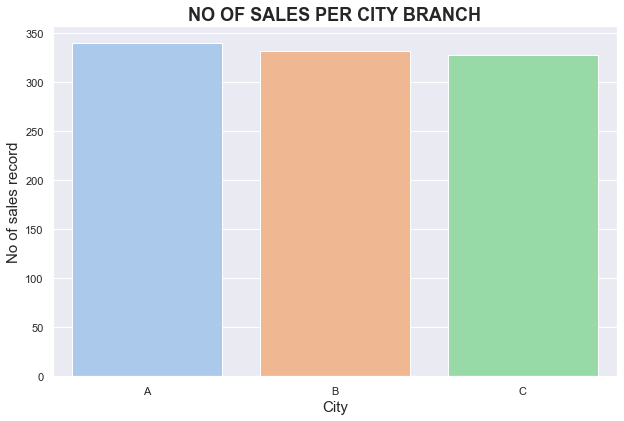

In [32]:
sns.set_theme(style="darkgrid")
# This shows the branch with the highest sales record which is Lagos
plt.subplots(figsize = (9,6))
city_order = ['A', 'B', 'C']
sales_record_chart = sns.countplot(x = 'Branch', data=company_xyz_concat, order=city_order, palette='pastel')
sales_record_chart.set_title('NO OF SALES PER CITY BRANCH', fontsize = 18, fontweight='bold')
sales_record_chart.set_xlabel('City', fontsize = 15)
sales_record_chart.set_ylabel('No of sales record', fontsize = 15)

#### Explore a countplot for the `Payment` and `City` Column

Text(0, 0.5, 'No of payments made')

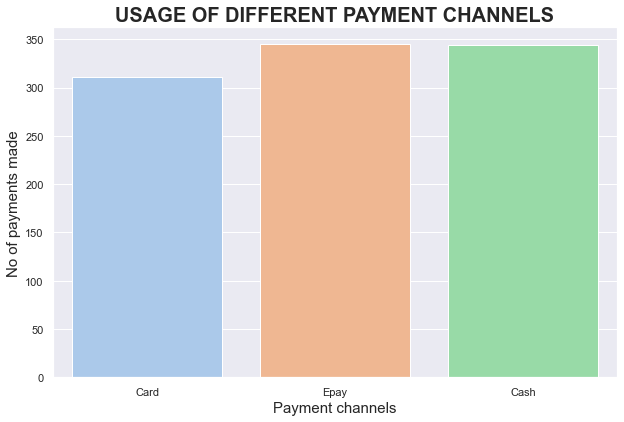

In [33]:
plt.subplots(figsize = (9,6))
payment_chart = sns.countplot(x = 'Payment', data=company_xyz_concat, palette='pastel')
payment_chart.set_title('USAGE OF DIFFERENT PAYMENT CHANNELS', fontsize = 20, fontweight='bold')
payment_chart.set_xlabel('Payment channels', fontsize = 15)
payment_chart.set_ylabel('No of payments made', fontsize = 15)

#### Determine the highest & lowest sold product line, using Countplot 
Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0, 0.5, 'Product categories')

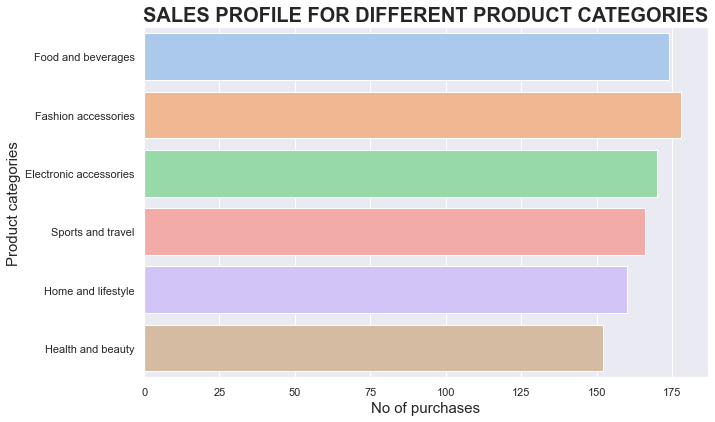

In [34]:

plt.subplots(figsize = (9,6))
product_category_chart = sns.countplot(y = 'Product line', data=company_xyz_concat, palette='pastel')
product_category_chart.set_title('SALES PROFILE FOR DIFFERENT PRODUCT CATEGORIES', fontsize = 20, fontweight='bold')
product_category_chart.set_xlabel('No of purchases', fontsize = 15)
product_category_chart.set_ylabel('Product categories', fontsize = 15)

#### Determine the Payment channel used by most customer to pay for each product line. Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0, 0.5, 'Product categories')

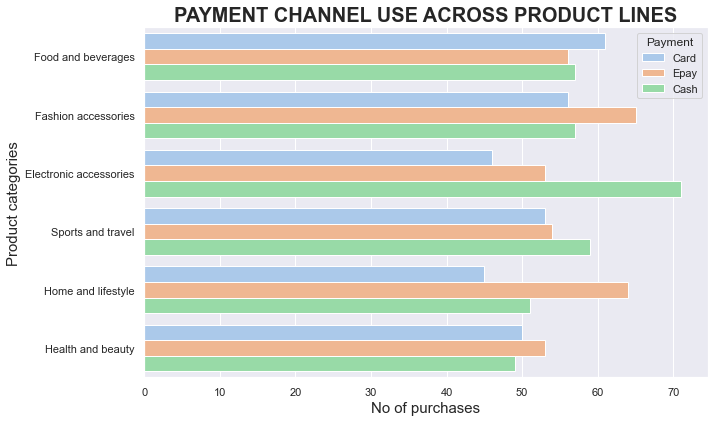

In [35]:
plt.subplots(figsize = (9,6))
product_category_chart_payment = sns.countplot(y = 'Product line', data=company_xyz_concat, hue='Payment', palette='pastel')
product_category_chart_payment.set_title('PAYMENT CHANNEL USE ACROSS PRODUCT LINES', fontsize = 20, fontweight='bold')
product_category_chart_payment.set_xlabel('No of purchases', fontsize = 15)
product_category_chart_payment.set_ylabel('Product categories', fontsize = 15)

#### Determine the Payment channel for each branch.
Use the hue parameter for the "branch" column

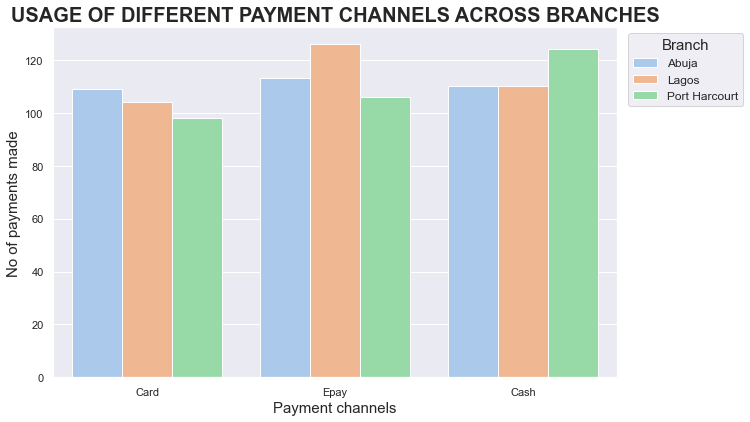

In [36]:
plt.subplots(figsize = (9,6))
payment_chart_branch = sns.countplot(x = 'Payment', data=company_xyz_concat, hue='City', palette='pastel')
payment_chart_branch.set_title('USAGE OF DIFFERENT PAYMENT CHANNELS ACROSS BRANCHES', fontsize = 20, fontweight='bold')
payment_chart_branch.set_xlabel('Payment channels', fontsize = 15)
payment_chart_branch.set_ylabel('No of payments made', fontsize = 15)
payment_chart_branch.legend(fontsize = 12, \
               bbox_to_anchor= (1.01, 1), \
               title="Branch", \
               title_fontsize = 15);

#### Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

Text(0, 0.5, 'Ratings')

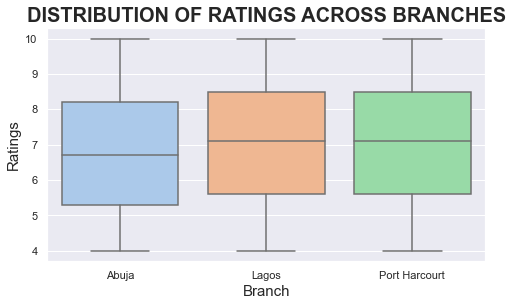

In [37]:
plt.subplots(figsize = (7,4))
branch_rating_chart = sns.boxplot(x="City", y="Rating", data=company_xyz_concat, palette='pastel')
branch_rating_chart.set_title('DISTRIBUTION OF RATINGS ACROSS BRANCHES', fontsize = 20, fontweight='bold')
branch_rating_chart.set_xlabel('Branch', fontsize = 15)
branch_rating_chart.set_ylabel('Ratings', fontsize = 15)

In [38]:
# All the branches have the lowest rating of 4
company_xyz_concat.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-05-24 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-05-24 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-05-24 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-05-24 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-05-24 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

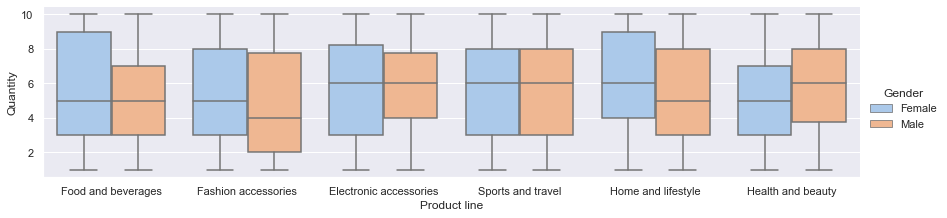

In [39]:
pqg = sns.catplot(x="Product line", y="Quantity", hue='Gender', kind='box', aspect=4, height=3, palette='pastel',
                  data=company_xyz_concat)


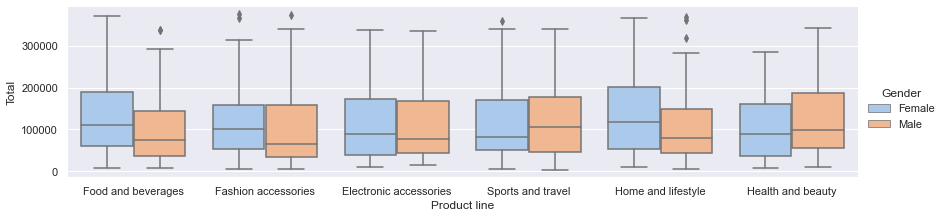

In [40]:
ptg = sns.catplot(x="Product line", y="Total", hue='Gender', kind='box', aspect=4, height=3, palette='pastel',
                  data=company_xyz_concat)

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

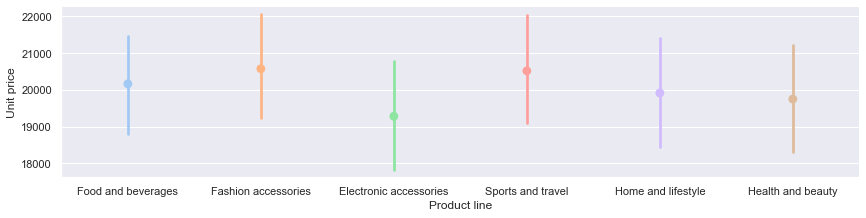

In [41]:

p_up = sns.catplot(x="Product line", y="Unit price", kind='point', aspect=4, height=3, palette='pastel',
                  data=company_xyz_concat)

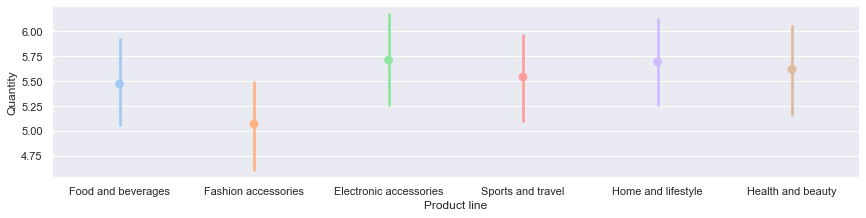

In [42]:
ptg = sns.catplot(x="Product line", y="Quantity", kind='point', aspect=4, height=3, palette='pastel',
                  data=company_xyz_concat)

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 